In [1]:
!wget http://cb.lk/covid_19

--2024-09-12 18:10:18--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 104.21.72.203, 172.67.187.81, 2606:4700:3032::ac43:bb51, ...
Connecting to cb.lk (cb.lk)|104.21.72.203|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2024-09-12 18:10:19--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/8jafvmu9s23e3bpmaou3c/CovidDataset-20200427T133042Z-001.zip?rlkey=p1slfgi51d7cmi5161ixvicmq&dl=0 [following]
--2024-09-12 18:10:20--  https://www.dropbox.com/scl/fi/8jafvmu9s23e3bpmaou3c/CovidDataset-20200427T133042Z-001.zip?rlkey=p1slfgi51d7cmi5161ixvicmq&dl=0
Reusing existing 

In [3]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [4]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [33]:
# CNN based model in kerras
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam',metrics=['accuracy'])


In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 220, 220, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 108, 108, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,668,097 (21.62 MB)

 Trainable params: 5,668,097 (21.62 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [29]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [30]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [58]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 30,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [60]:
hist = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 453ms/step - accuracy: 0.9932 - loss: 0.0207 - val_accuracy: 0.9667 - val_loss: 0.1157
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 299ms/step - accuracy: 0.9934 - loss: 0.0092 - val_accuracy: 0.9667 - val_loss: 0.1434
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 462ms/step - accuracy: 1.0000 - loss: 0.0112 - val_accuracy: 0.9667 - val_loss: 0.0908
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 272ms/step - accuracy: 0.9858 - loss: 0.0464 - val_accuracy: 0.9667 - val_loss: 0.1433
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 271ms/step - accuracy: 0.9907 - loss: 0.0291 - val_accuracy: 0.9667 - val_loss: 0.0605
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 457ms/step - accuracy: 0.9907 - loss: 0.0219 - val_accuracy: 0.9667 - val_loss: 0.0985
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 271ms/step - accuracy: 0.9878 - loss: 0.0201 - val_accuracy: 0.9500 - val_loss: 0.0754
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 271ms/step - accuracy: 1.0000 - loss: 0.0142 - val_accuracy: 0.9500 - val_los

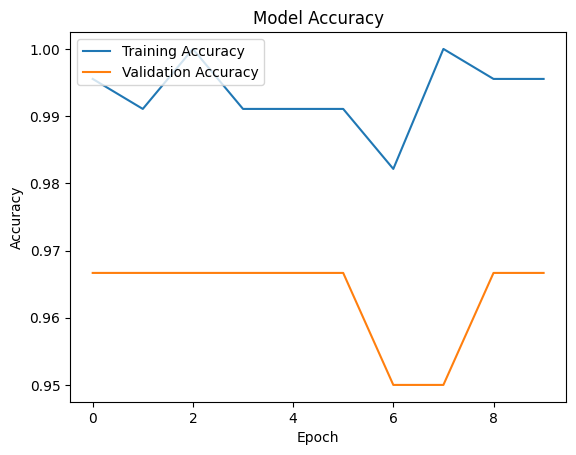

In [62]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


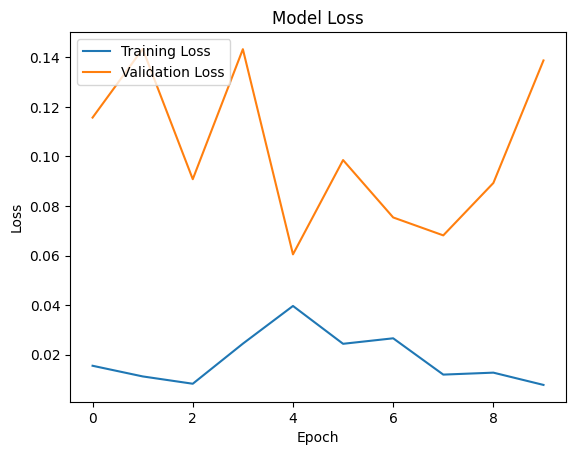

In [63]:
# Plot training & validation loss values
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [66]:
# Save the model in HDF5 format
model.save('model.h5')
